FLIGHT PRICE PREDICTION

Problem Statement:
Airlines implement dynamic pricing for their tickets, and base their pricing decisions on demand estimation models. The reason for such a complicated system is that each flight only has a set number of seats to sell, so airlines have to regulate demand. In the case where demand is expected to exceed capacity, the airline may increase prices, to decrease the rate at which seats fill. On the other hand, a seat that goes unsold represents a loss of revenue, and selling that seat for any price above the service cost for a single passenger would have been a more preferable scenario.

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights. This project contains three phase-

1. Data Collection:
I have done web scraping to collect the data of flight ticket prices from the well known website https://www.yatra.com/ where I found more features of flights compared to other websites and I fetch data for different locations. As per the requirement we need to build the model to predict the prices of different flight tickets.

2. Data Analysis:
After cleaning the data, we have to do some analysis on the data.

1.Do airfares change frequently? Do they move in small increments or in large jumps?
2.Do they tend to go up or down over time?
3.What is the best time to buy so that the consumer can save the most by taking the least risk?
4.Does price increase as we get near to departure date?
5.Is Indigo cheaper than Jet Airways?
6.Are morning flights expensive?

3. Model Building:
After collecting the data, we need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the bestmodel.

Follow the complete life cycle of data science. Include all the steps like

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Pre-processing

4. Model Building

5. Model Evaluation

6. Selecting the best model

Importing necessary libraries/dependencies.

In [62]:
# Preprocessing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   # To remove outliers
# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Importing collected dataset

In [63]:
# Reading excel file
df = pd.read_excel(r"C:\Users\tribe\OneDrive\Desktop\Flight Project\Flight data.xlsx")
df

,Unnamed: 0,AirlineName,DepartureTime,ArrivalTime,Souce,Destination,Duration,Total_Stops,Date,Price
0,0,SpiceJet,07:20,09:35,New Delhi,Mumbai,2h 15m,Non,24 Apr,4798
1,1,SpiceJet,06:20,08:45,New Delhi,Mumbai,2h 25m,Non,24 Apr,4798
2,2,Go First,02:40,04:50,New Delhi,Mumbai,2h 10m,Non,24 Apr,4800
3,3,Air Asia,04:25,06:35,New Delhi,Mumbai,2h 10m,Non,24 Apr,4800
4,4,Go First,06:00,08:10,New Delhi,Mumbai,2h 10m,Non,24 Apr,4800
...,...,...,...,...,...,...,...,...,...,...
2206,2206,Vistara,07:10,17:45,Kolkata,Bangalore,10h 35m,2,10 May,13839
2207,2207,Vistara,07:10,17:45,Kolkata,Bangalore,10h 35m,2,10 May,13839
2208,2208,Vistara,07:10,17:45,Kolkata,Bangalore,10h 35m,2,10 May,13839
2209,2209,Air India,19:00,17:55\n+ 1 day,Kolkata,Bangalore,22h 55m,2,10 May,15204


Here I am importing the colleced dataset which is in excel format and storing it into dataframe (df) for further usage. Here we can observe first 5 and last 5 rows of the dataset. There are 2211 rows and 10 columns in the dataframe. The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable "Price" which stores the price of the flight tickets and it is continuous in nature which makes this problem to be a "Regression Problem".

In [64]:
df.rename(columns={'Souce':'Source'},inplace=True)

In [65]:
df.head()

,Unnamed: 0,AirlineName,DepartureTime,ArrivalTime,Source,Destination,Duration,Total_Stops,Date,Price
0,0,SpiceJet,07:20,09:35,New Delhi,Mumbai,2h 15m,Non,24 Apr,4798
1,1,SpiceJet,06:20,08:45,New Delhi,Mumbai,2h 25m,Non,24 Apr,4798
2,2,Go First,02:40,04:50,New Delhi,Mumbai,2h 10m,Non,24 Apr,4800
3,3,Air Asia,04:25,06:35,New Delhi,Mumbai,2h 10m,Non,24 Apr,4800
4,4,Go First,06:00,08:10,New Delhi,Mumbai,2h 10m,Non,24 Apr,4800


Data Cleaning

In [66]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()   # Displaying the dataframe

,AirlineName,DepartureTime,ArrivalTime,Source,Destination,Duration,Total_Stops,Date,Price
0,SpiceJet,07:20,09:35,New Delhi,Mumbai,2h 15m,Non,24 Apr,4798
1,SpiceJet,06:20,08:45,New Delhi,Mumbai,2h 25m,Non,24 Apr,4798
2,Go First,02:40,04:50,New Delhi,Mumbai,2h 10m,Non,24 Apr,4800
3,Air Asia,04:25,06:35,New Delhi,Mumbai,2h 10m,Non,24 Apr,4800
4,Go First,06:00,08:10,New Delhi,Mumbai,2h 10m,Non,24 Apr,4800


Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a worthy feature column for prediction. We can observe first 5 rows of the dataset.

In [67]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 2211 rows and 9 columns in our dataframe


The dataset contains 2211 rows and 9 columns. Out of 9 columns 8 are independent variables and remaining one is our target variable "Price" which is dependent variable.

In [68]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['AirlineName', 'DepartureTime', 'ArrivalTime', 'Source', 'Destination',
       'Duration', 'Total_Stops', 'Date', 'Price'],
      dtype='object')


These are the columns present in our dataset.

In [69]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
AirlineName,6
DepartureTime,237
ArrivalTime,384
Source,5
Destination,11
Duration,324
Total_Stops,4
Date,19
Price,709


Above are the number of unique values present in each of the columns present in the dataset.

In [70]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AirlineName    2211 non-null   object
 1   DepartureTime  2211 non-null   object
 2   ArrivalTime    2211 non-null   object
 3   Source         2211 non-null   object
 4   Destination    2211 non-null   object
 5   Duration       2211 non-null   object
 6   Total_Stops    2211 non-null   object
 7   Date           2211 non-null   object
 8   Price          2211 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 155.6+ KB


i)This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.

ii)The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

iii)Since counts of all the columns are same, which means there are no null values present in the dataset.

In [71]:
# Checking null values in the dataset
df.isnull().sum()

AirlineName      0
DepartureTime    0
ArrivalTime      0
Source           0
Destination      0
Duration         0
Total_Stops      0
Date             0
Price            0
dtype: int64

As we can see there are no missing values in any of the columns.

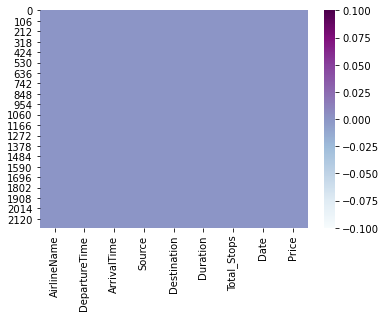

In [72]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="BuPu")
plt.show()

Here we can clearly observe there are no missing values.

Value count function

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries present in the dataset

In [73]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*80)

IndiGo       637
Vistara      630
Air India    401
Go First     225
Air Asia     191
SpiceJet     127
Name: AirlineName, dtype: int64
********************************************************************************
07:00    51
06:00    45
08:30    32
06:10    30
07:20    30
         ..
23:20     1
04:35     1
13:10     1
04:30     1
03:10     1
Name: DepartureTime, Length: 237, dtype: int64
********************************************************************************
14:45\n+ 1 day    39
22:20             32
14:05\n+ 1 day    31
07:50\n+ 1 day    27
22:45             25
                  ..
11:05              1
23:00\n+ 1 day     1
16:30\n+ 1 day     1
07:10\n+ 1 day     1
02:10\n+ 1 day     1
Name: ArrivalTime, Length: 384, dtype: int64
********************************************************************************
New Delhi    614
Mumbai       555
Bangalore    544
Hyderabad    361
Kolkata      137
Name: Source, dtype: int64
********************************************************

These are the value counts of the columns present in the dataset.

Feature Engineering

The columns Time_of_arrival and Departure_Time showing object data type which means python is not able to understand the type of data in this column due to some string values or categorical signs like ":" which we can observe in the value count function. Therefore, we have to convert this datatype into timestamp (datetime) to use them properly for prediction.

In [74]:
for i in range(len(df['ArrivalTime'].to_list())):
    try:
        df.ArrivalTime.iloc[i]=df.ArrivalTime.iloc[i].split("\n")[0]
    except:
        continue

In [77]:
# Converting columns from object type to Datetime Type
df["DepartureTime"] = pd.to_datetime(df["DepartureTime"])
df["ArrivalTime"] = pd.to_datetime(df["ArrivalTime"])

In [78]:
#Checking the data types of all columns again
df.dtypes

AirlineName              object
DepartureTime    datetime64[ns]
ArrivalTime      datetime64[ns]
Source                   object
Destination              object
Duration                 object
Total_Stops              object
Date                     object
Price                     int64
dtype: object

Duration


The column Duration has values in terms of minutes and hours. Duration means the time taken by the plane to reach the destination and it is the difference between the arrival time and Departure time. Let's extract proper duration time in terms of float data type from ArrivalTime and DepartureTime columns.

In [80]:
#Extracting Duration column using Arrival_Time and Departure_Time
Difference = (df["ArrivalTime"]-df["DepartureTime"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600  # Converting difference into seconds and Dividing it by 3600 (1hr=3600seconds)
    Diff_list.append(duration)
df["Duration"] = Diff_list

Departure_time

Let's extract values from Departure_time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Departure_time.

In [82]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Departure_time column
df["Departure_Hour"] = pd.to_datetime(df["DepartureTime"]).dt.hour

# Extracting Minutes from Dep_Time column
df["Departure_Min"] = pd.to_datetime(df["DepartureTime"]).dt.minute

Now we have extracted hour and minute from Departure_time column. Let's drop Departure_time column as it is of no use now.

In [83]:
# Dropping Departure_time column
df.drop("DepartureTime",axis=1,inplace=True)

#ArrivalTime
Similarly we can extract hours and minutes from ArrivalTime column and dropping ArrivalTime column.

In [84]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Time_of_arrival column
df["Arrival_Hour"] = pd.to_datetime(df["ArrivalTime"]).dt.hour

# Extracting Minutes from Arrival_Time column
df["Arrival_Min"] = pd.to_datetime(df["ArrivalTime"]).dt.minute

# Dropping Arrival_Time column
df.drop("ArrivalTime",axis=1,inplace=True)

Now we have extracted required data from the columns.

#Price
The target column should be in continuous numeric data type but it is appearing as object data type due to some categorical sign ",". Let's replace this sign by empty space and convert the type into float.

In [91]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].replace(',','')
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')


Total_Stops
From the value count function of Total_Stops we can observe the categorical values, let's replace them with numeric data.

In [92]:
# Replacing categorical values with numeric data
df.Total_Stops.replace({"Non Stop": 0,"1 Stop": 1,"2 Stop(s)": 2,"3 Stop(s)": 3,"4 Stop(s)": 4},inplace = True)

Now we have successfully cleaned our data, let's have a look at dataframe.

In [93]:
# Checking dataset again
df

,AirlineName,Source,Destination,Duration,Total_Stops,Date,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,SpiceJet,New Delhi,Mumbai,2.250000,Non,24 Apr,4798.0,7,20,9,35
1,SpiceJet,New Delhi,Mumbai,2.416667,Non,24 Apr,4798.0,6,20,8,45
2,Go First,New Delhi,Mumbai,2.166667,Non,24 Apr,4800.0,2,40,4,50
3,Air Asia,New Delhi,Mumbai,2.166667,Non,24 Apr,4800.0,4,25,6,35
4,Go First,New Delhi,Mumbai,2.166667,Non,24 Apr,4800.0,6,0,8,10
...,...,...,...,...,...,...,...,...,...,...,...
2206,Vistara,Kolkata,Bangalore,10.583333,2,10 May,13839.0,7,10,17,45
2207,Vistara,Kolkata,Bangalore,10.583333,2,10 May,13839.0,7,10,17,45
2208,Vistara,Kolkata,Bangalore,10.583333,2,10 May,13839.0,7,10,17,45
2209,Air India,Kolkata,Bangalore,22.916667,2,10 May,15204.0,19,0,17,55


In [94]:
# Checking shape of data after cleaning 
df.shape

(2211, 11)

Now the dataset contains 2211 rows and 10 columns.

In [95]:
# Let's check the data types of the columns
df.dtypes

AirlineName        object
Source             object
Destination        object
Duration          float64
Total_Stops        object
Date               object
Price             float64
Departure_Hour      int64
Departure_Min       int64
Arrival_Hour        int64
Arrival_Min         int64
dtype: object

In [96]:
# Checking the uniqueness of target column
df["Price"].unique()

array([ 4798.,  4800.,  4801.,  5010.,  5062.,  5063.,  5112.,  5220.,
        5325.,  5428.,  5430.,  5535.,  5850.,  5955.,  6002.,  6060.,
        6143.,  6478.,  6585.,  6848.,  6953.,  7216.,  7268.,  7293.,
        7320.,  7373.,  7425.,  7688.,  7800.,  7845.,  7950.,  7977.,
        8108.,  8160.,  8370.,  8475.,  8476.,  8685.,  8843.,  8895.,
        9065.,  9158.,  9289.,  9315.,  9316.,  9485.,  9735.,  9778.,
        9840.,  9841.,  9909., 10050., 10103., 10155., 10156., 10313.,
       10349., 10470., 10890., 10995., 11310., 11415., 11520., 11730.,
       12252., 12255., 12571., 12780., 13095., 13200., 13305., 13620.,
       21059., 23613.,  5322.,  5324.,  5326.,  5378.,  6743.,  7292.,
        7584.,  7793.,  7814.,  7855.,  8234.,  8238.,  8318.,  8338.,
        8361.,  8397.,  8423.,  8528.,  8580.,  8686.,  8790.,  8948.,
        9000.,  9420.,  9473.,  9479.,  9788.,  9812., 10260., 10680.,
       10785., 10838., 11048., 12150., 12623., 12885., 13378., 13410.,
      

In [97]:
# Checking whether the target contains any space
df.loc[df['Price']==" "]

,AirlineName,Source,Destination,Duration,Total_Stops,Date,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min


There is no any empty space in any of the columns.

Description of Dataset

In [98]:
# Statistical summary of dataset
df.describe()

,Duration,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,8.649103,8729.001357,12.806875,25.483944,14.243329,29.043419
std,5.673078,2927.461178,5.663191,18.014350,6.149094,17.279992
min,0.000000,2878.000000,0.000000,0.000000,0.000000,0.000000
25%,4.291667,6291.000000,8.000000,10.000000,10.000000,15.000000
50%,7.416667,8541.000000,12.000000,25.000000,14.000000,30.000000
75%,11.916667,10374.000000,18.000000,40.000000,19.000000,45.000000
max,23.916667,23613.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things
i)The counts of every column is same which means there are no missing values present in the dataset.


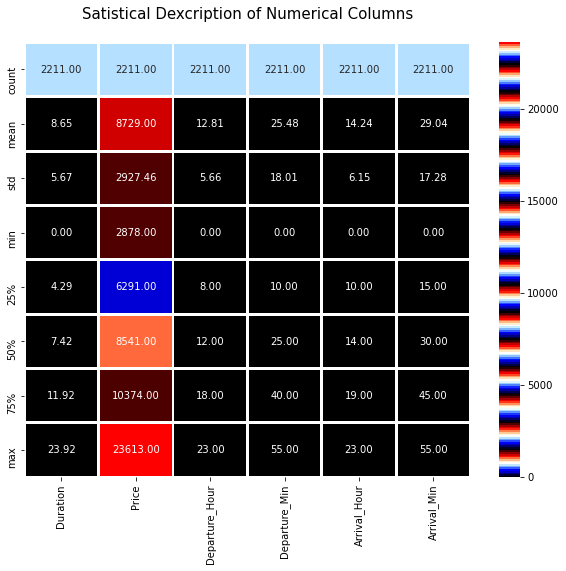

In [99]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="flag_r")
plt.title("Satistical Dexcription of Numerical Columns\n",fontsize=15)

plt.show()


Separating numerical and categorical columns

In [100]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['AirlineName', 'Source', 'Destination', 'Total_Stops', 'Date']

Numerical columns present in the dataset are:
 ['Duration', 'Price', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


Exploratory Data Analysis (EDA)

Data Visualization

Univariate Analysis

Plotting categorical Variables

IndiGo       637
Vistara      630
Air India    401
Go First     225
Air Asia     191
SpiceJet     127
Name: AirlineName, dtype: int64 

1      1572
Non     392
2       240
3         7
Name: Total_Stops, dtype: int64


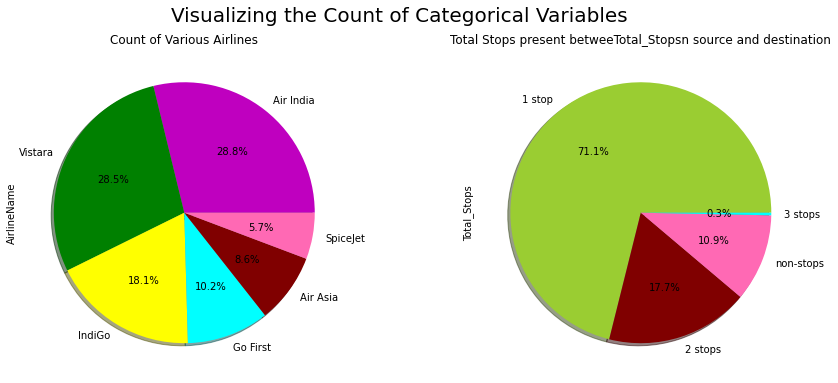

In [101]:
# Visualizing the count of categorical variables
plt.figure(figsize=(15,6))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=20)

# Visualizing the count of Airlines
plt.subplot(1,2,1)
print(df["AirlineName"].value_counts(),"\n")
plt.title('Count of Various Airlines')
labels = ['Air India', 'Vistara', 'IndiGo', 'Go First', 'Air Asia', 'SpiceJet']
colors = ["m", "green","yellow", "cyan", "maroon", "hotpink"]
df['AirlineName'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)

# Visualizing the count of Number_of_stops
plt.subplot(1,2,2)
print(df['Total_Stops'].value_counts())
plt.title('Total Stops present betweeTotal_Stopsn source and destination')
labels = ['1 stop', '2 stops', 'non-stops', '3 stops', '4 stops']
colors = ["yellowgreen","maroon","hotpink","cyan","red"]
df['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)
plt.show()

New Delhi    614
Mumbai       555
Bangalore    544
Hyderabad    361
Kolkata      137
Name: Source, dtype: int64 

New Delhi     452
Bangalore     367
Goa           291
Kolkata       267
Chennai       248
Mumbai        162
Varanasi      104
Lucknow        87
Guwahati       83
Chandigarh     77
Jaipur         73
Name: Destination, dtype: int64


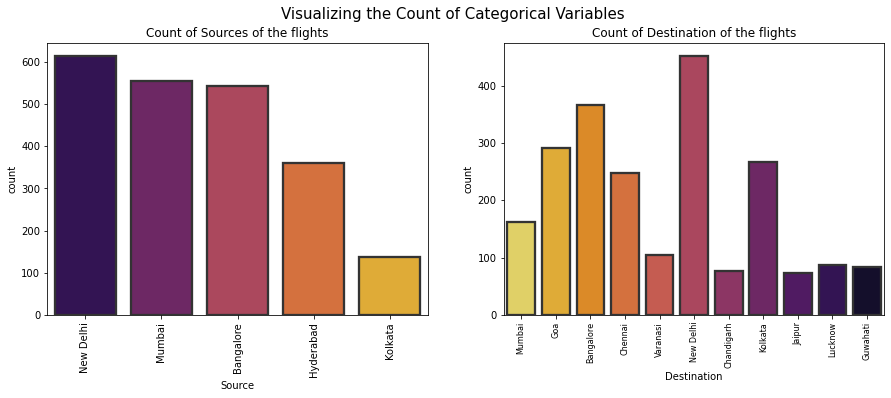

In [102]:
# Visualizing the count of categorical variables
plt.figure(figsize=(15,5))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=15)

# Visualizing the count of Sources of the flights
plt.subplot(1,2,1)
print(df['Source'].value_counts(),"\n")
plt.title('Count of Sources of the flights')
sns.countplot('Source', data=df, palette="inferno",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)

# Visualizing the count of Destination of the flights
plt.subplot(1,2,2)
print(df['Destination'].value_counts())
plt.title('Count of Destination of the flights')
sns.countplot('Destination', data=df, palette="inferno_r",linewidth=2.3, edgecolor=".2")
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

Distribution of skewness

Plotting Numerical Variables

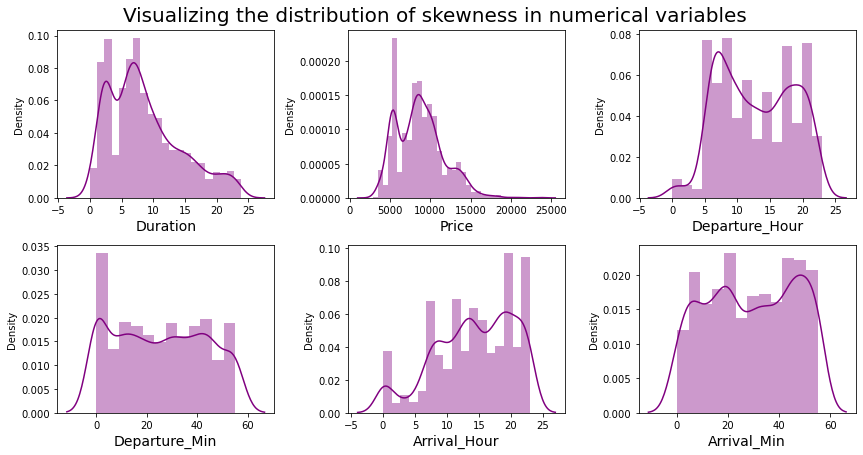

In [103]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Bivariate Analysis

Visualizing Categorical Variables vs Target Variable Price

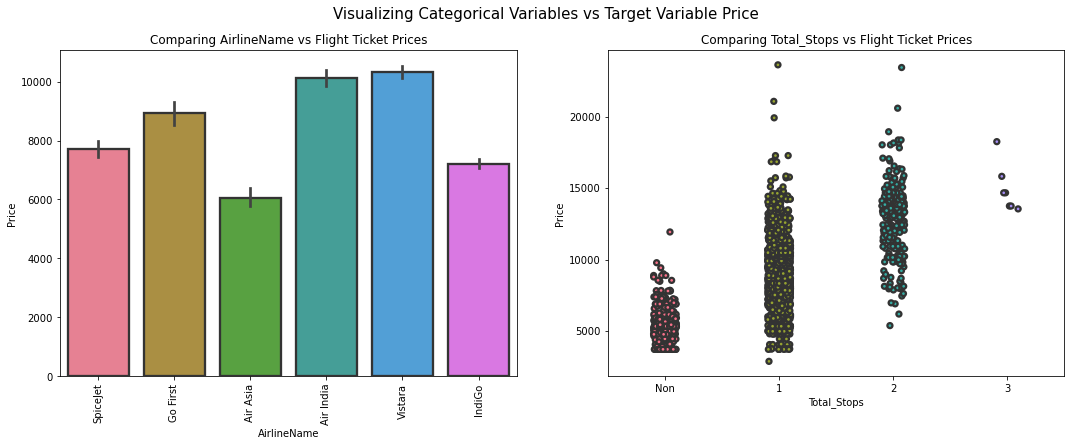

In [104]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price",fontsize=15)

# Checking which Airline is expensive based on Price of tickets
plt.subplot(1,2,1)
plt.title("Comparing AirlineName vs Flight Ticket Prices")
sns.barplot(x= df['AirlineName'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)

# Checking flights which have meals availability are expensive or not?
plt.subplot(1,2,2)
plt.title("Comparing Total_Stops vs Flight Ticket Prices")
sns.stripplot(x = df['Total_Stops'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

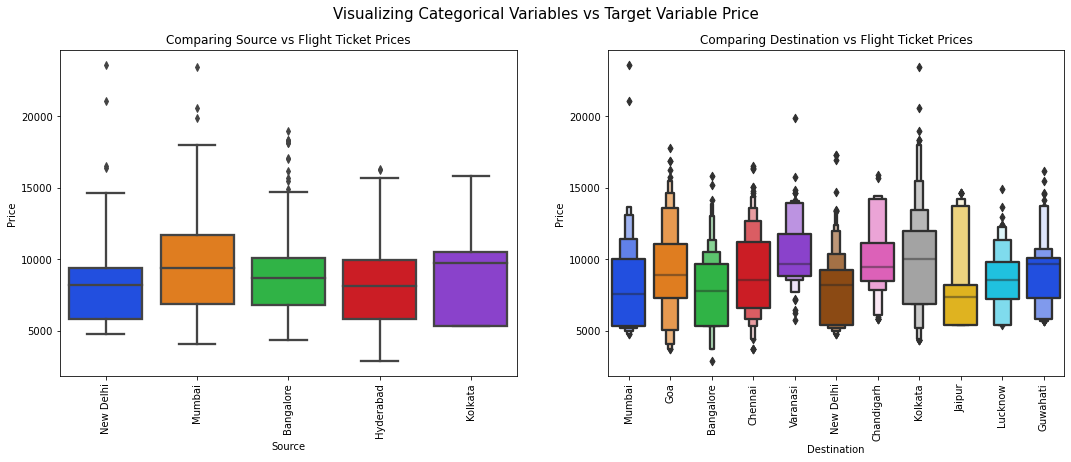

In [105]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# Checking which source has highest ticket price
plt.subplot(1,2,1)
plt.title("Comparing Source vs Flight Ticket Prices")
sns.boxplot(x= df['Source'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)

# Checking how prices changes in each destination 
plt.subplot(1,2,2)
plt.title("Comparing Destination vs Flight Ticket Prices")
sns.boxenplot(x = df['Destination'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)
plt.show()

Visualizing Numerical Variables vs Target Variable Price

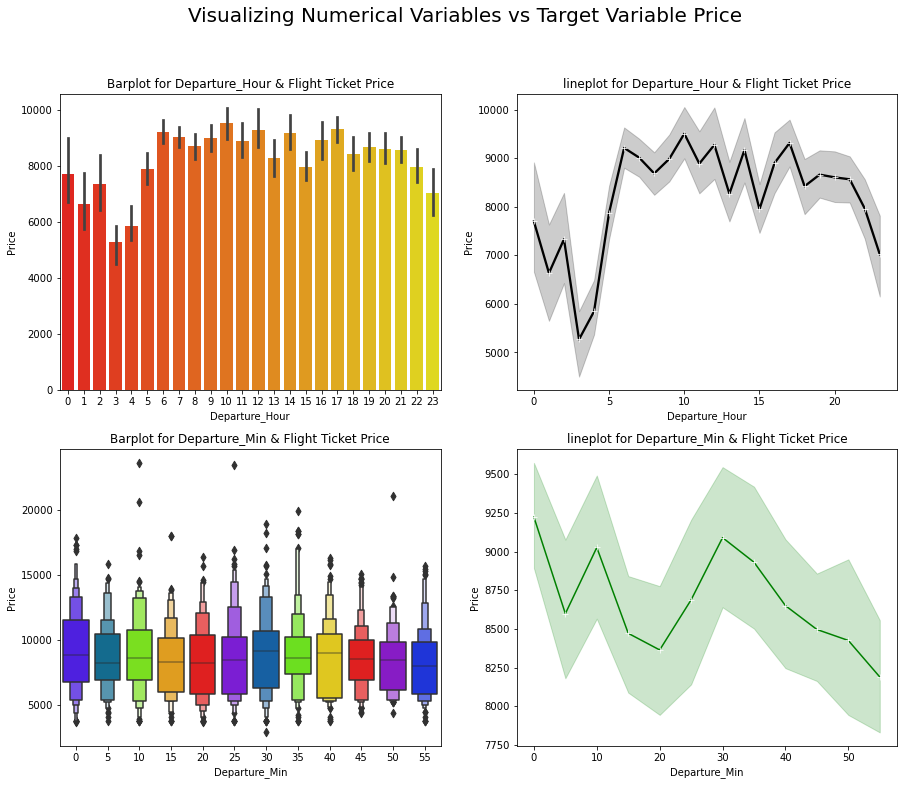

In [106]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Departure_Hour & Flight Ticket Price")
sns.barplot(x= df['Departure_Hour'],y= df['Price'],palette = "autumn",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Departure_Hour & Flight Ticket Price")
sns.lineplot(x = df['Departure_Hour'],y= df['Price'],marker="+",color='k',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Departure_Min & Flight Ticket Price")
sns.boxenplot(x='Departure_Min',y='Price',data=df,palette = "prism",color='k')

plt.subplot(2,2,4)
plt.title("lineplot for Departure_Min & Flight Ticket Price")
sns.lineplot(x='Departure_Min',y='Price',data=df,marker="+",color='g')

plt.show()

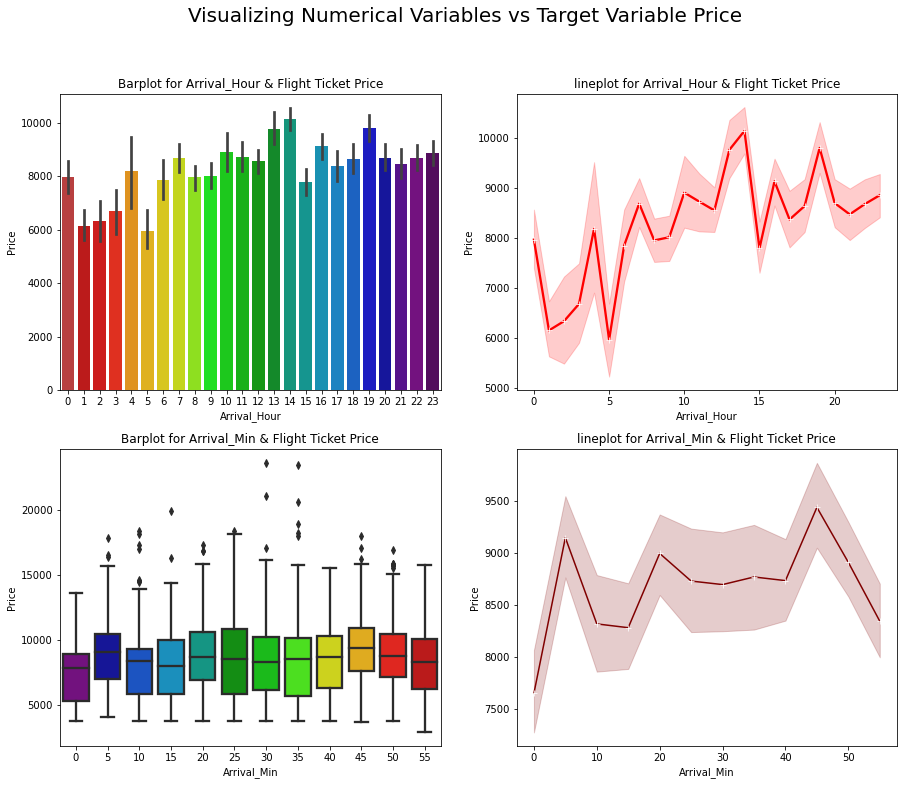

In [107]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Arrival_Hour & Flight Ticket Price")
sns.barplot(x= df['Arrival_Hour'],y= df['Price'],palette = "nipy_spectral_r",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Arrival_Hour & Flight Ticket Price")
sns.lineplot(x = df['Arrival_Hour'],y= df['Price'],marker="+",color='r',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Arrival_Min & Flight Ticket Price")
sns.boxplot(x='Arrival_Min',y='Price',data=df,palette = "nipy_spectral",linewidth=2.3)

plt.subplot(2,2,4)
plt.title("lineplot for Arrival_Min & Flight Ticket Price")
sns.lineplot(x='Arrival_Min',y='Price',data=df,marker="+",color='maroon')

plt.show()

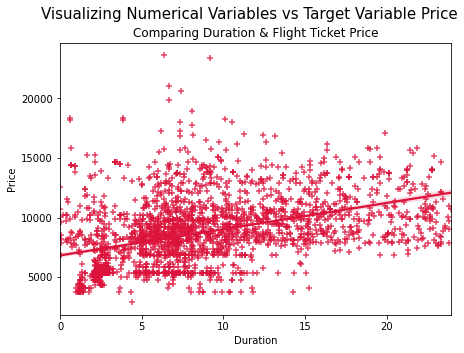

In [108]:
# Visualizing duration and price
plt.figure(figsize = (7,5))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=15)

plt.title("Comparing Duration & Flight Ticket Price")
sns.regplot(x= df['Duration'],y= df['Price'],marker="+",color='crimson')
plt.show()

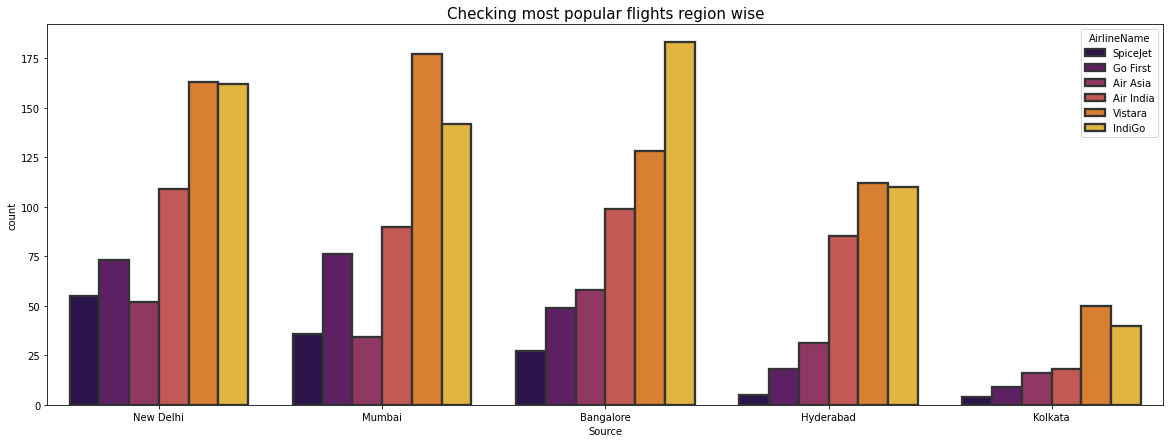

In [109]:
# Lets chcek the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "AirlineName", data = df, palette = "inferno",linewidth=2.3, edgecolor=".2")
plt.title("Checking most popular flights region wise",fontsize=15)
plt.show()

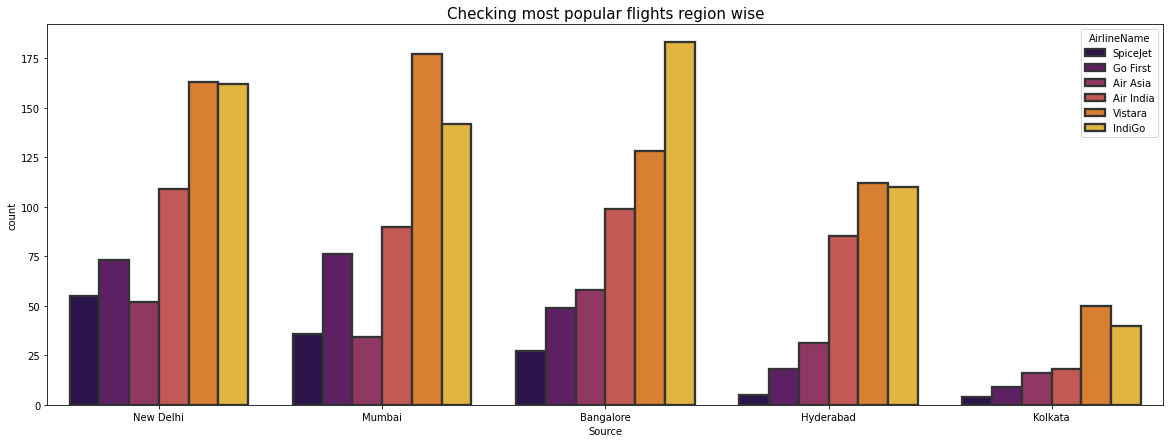

In [110]:
# Lets chcek the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "AirlineName", data = df, palette = "inferno",linewidth=2.3, edgecolor=".2")
plt.title("Checking most popular flights region wise",fontsize=15)
plt.show()

Multivariate Analysis

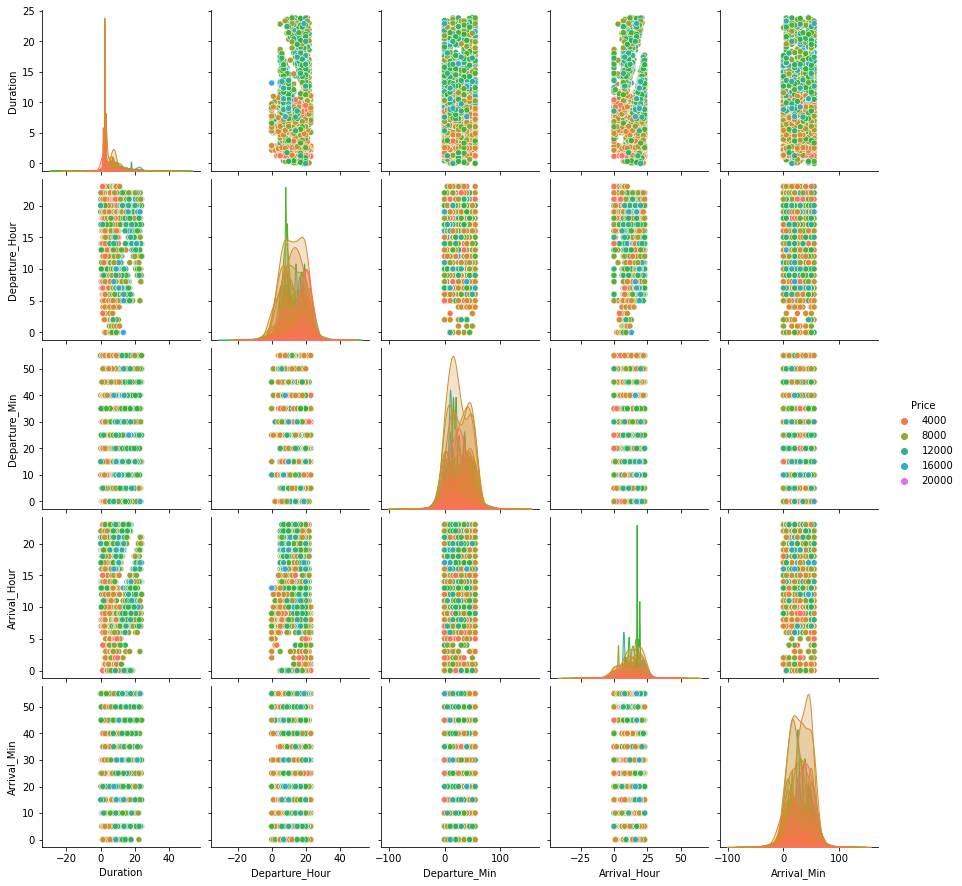

In [111]:
sns.pairplot(df,hue="Price",palette="husl")
plt.show()

Data Pre-processing

Identifying the outliers

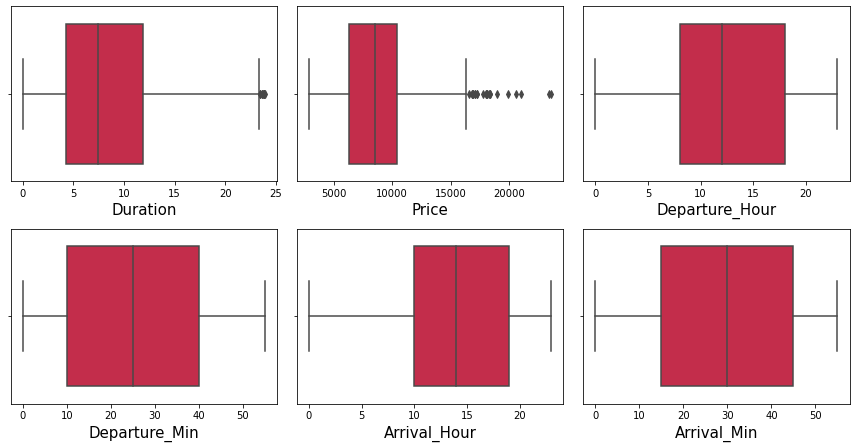

In [112]:
# Identifying the outliers using boxplot

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Checking for skewness in the data

In [113]:
# Checking the skewness
df.skew()

Duration          0.776550
Price             0.662070
Departure_Hour    0.022482
Departure_Min     0.077222
Arrival_Hour     -0.511609
Arrival_Min      -0.063588
dtype: float64

Removing skewness using square root transformation

In [114]:
df["Duration"] = np.sqrt(df["Duration"])

In [115]:
# Again checking the skewness
df.skew()

Duration          0.099662
Price             0.662070
Departure_Hour    0.022482
Departure_Min     0.077222
Arrival_Hour     -0.511609
Arrival_Min      -0.063588
dtype: float64

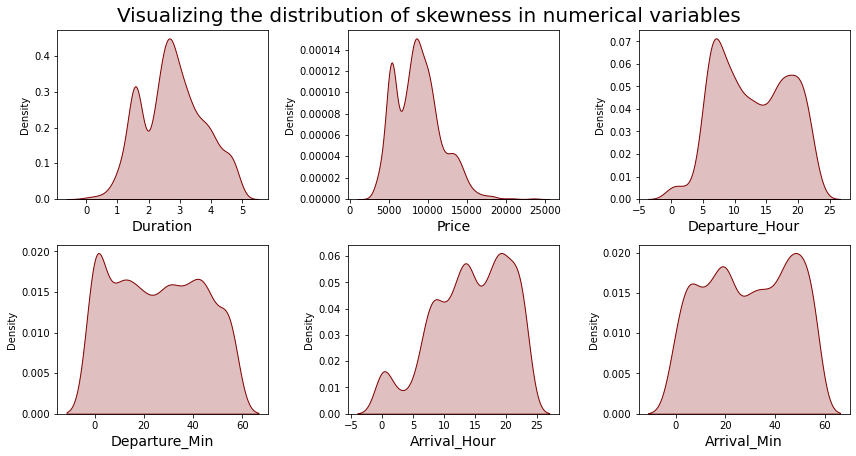

In [116]:
# Checking how the data has been distriubted after removing skewness in the column
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],hist=False, color="maroon", kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Encoding the categorical columns using Label Encoder Method

In [117]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [118]:
# Displaying dataframe after encoding 
df

,AirlineName,Source,Destination,Duration,Total_Stops,Date,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,4,4,8,1.500000,3,7,4798.0,7,20,9,35
1,4,4,8,1.554563,3,7,4798.0,6,20,8,45
2,2,4,8,1.471960,3,7,4800.0,2,40,4,50
3,0,4,8,1.471960,3,7,4800.0,4,25,6,35
4,2,4,8,1.471960,3,7,4800.0,6,0,8,10
...,...,...,...,...,...,...,...,...,...,...,...
2206,5,2,0,3.253204,1,1,13839.0,7,10,17,45
2207,5,2,0,3.253204,1,1,13839.0,7,10,17,45
2208,5,2,0,3.253204,1,1,13839.0,7,10,17,45
2209,1,2,0,4.787136,1,1,15204.0,19,0,17,55


Now we have converted the categorical columns into numerical columns using label encoding method.

Correlation between the target variable and independent variables using HEAT map

In [119]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,AirlineName,Source,Destination,Duration,Total_Stops,Date,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
AirlineName,1.000000,0.044656,-0.030264,0.098025,-0.027845,-0.028605,0.209980,0.000328,0.166475,0.188549,0.061666
Source,0.044656,1.000000,-0.235340,-0.026682,0.060152,-0.105163,0.002444,0.015831,-0.046848,-0.036684,-0.016860
Destination,-0.030264,-0.235340,1.000000,-0.014873,0.043390,-0.094547,0.017914,-0.042492,0.000763,-0.005190,0.004686
Duration,0.098025,-0.026682,-0.014873,1.000000,-0.538372,0.016344,0.436946,0.123849,0.003898,-0.016413,0.057577
Total_Stops,-0.027845,0.060152,0.043390,-0.538372,1.000000,-0.016268,-0.373770,0.041861,0.015712,-0.026209,-0.029914
Date,-0.028605,-0.105163,-0.094547,0.016344,-0.016268,1.000000,-0.128823,0.034517,0.031552,-0.001726,0.035859
Price,0.209980,0.002444,0.017914,0.436946,-0.373770,-0.128823,1.000000,-0.021971,-0.071635,0.126891,0.043774
Departure_Hour,0.000328,0.015831,-0.042492,0.123849,0.041861,0.034517,-0.021971,1.000000,0.067602,-0.088632,0.023589
Departure_Min,0.166475,-0.046848,0.000763,0.003898,0.015712,0.031552,-0.071635,0.067602,1.000000,0.019402,0.021802
Arrival_Hour,0.188549,-0.036684,-0.005190,-0.016413,-0.026209,-0.001726,0.126891,-0.088632,0.019402,1.000000,-0.074610


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

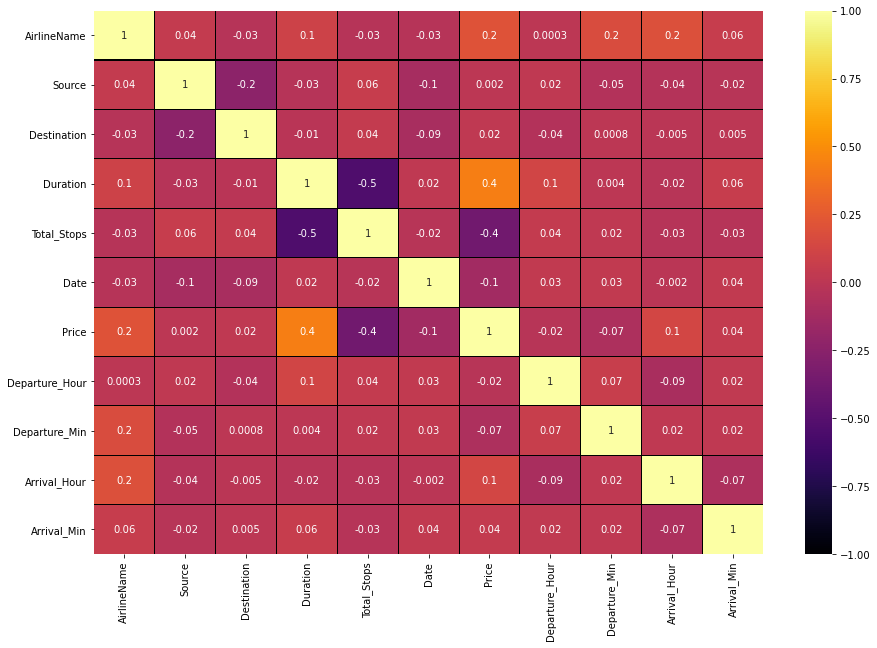

In [120]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="inferno")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

i)This heat map contains both positive and negative correlation.
ii)The features Number_of_stops, Duration Arrival_Hour and Airline are highly positively correlated with the target column compared to other features.
iii)The other features have very less correlation with the target column.
iv)From the map we can also observe there is no multicollinearity issue exists.

In [121]:
cor['Price'].sort_values(ascending=False)

Price             1.000000
Duration          0.436946
AirlineName       0.209980
Arrival_Hour      0.126891
Arrival_Min       0.043774
Destination       0.017914
Source            0.002444
Departure_Hour   -0.021971
Departure_Min    -0.071635
Date             -0.128823
Total_Stops      -0.373770
Name: Price, dtype: float64

Here we can notice the positive and negative correlation between features and label in the descending order.

Visualizing the correlation between label and features using bar plot

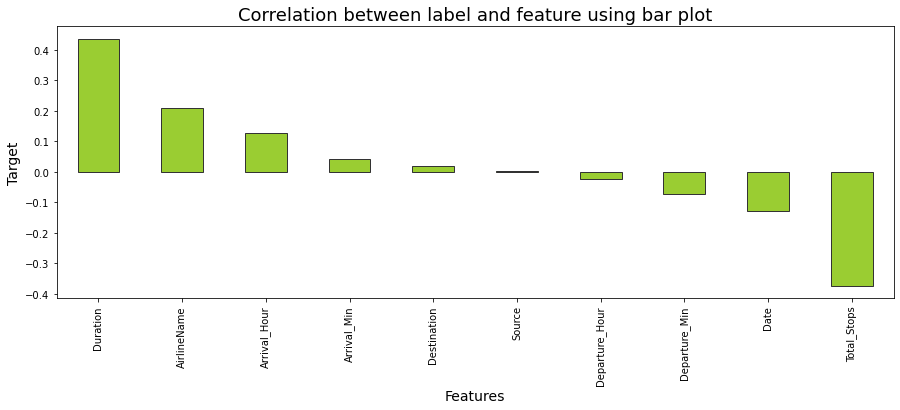

In [122]:
plt.figure(figsize=(15,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='yellowgreen',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "Departure_Min" has less correlation with the label compared to other features, we can drop this column if necessary but for now let's keep it as it is.

Separating the feature and label into x and y

In [123]:
x = df.drop("Price", axis=1)
y = df["Price"]

We have separated both dependent and independent variables.

In [124]:
# Dimension of x and y
x.shape, y.shape

((2211, 10), (2211,))

Feature Scaling Using StandardScaler

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,AirlineName,Source,Destination,Duration,Total_Stops,Date,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,0.656052,1.172552,0.918419,-1.290117,2.065064,-0.210852,-1.025603,-0.304490,-0.852892,0.344788
1,0.656052,1.172552,0.918419,-1.234733,2.065064,-0.210852,-1.202222,-0.304490,-1.015555,0.923623
2,-0.540755,1.172552,0.918419,-1.318578,2.065064,-0.210852,-1.908698,0.805987,-1.666204,1.213040
3,-1.737563,1.172552,0.918419,-1.318578,2.065064,-0.210852,-1.555460,-0.026870,-1.340880,0.344788
4,-0.540755,1.172552,0.918419,-1.318578,2.065064,-0.210852,-1.202222,-1.414967,-1.015555,-1.102300


We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling.

Building Machine Learning Models

Finding the Best Random State and Accuracy

In [126]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)


Maximum r2 score is  0.8296713969115904  on Random_state  113


Feature Importance

In [128]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Total_Stops,0.459
AirlineName,0.155
Date,0.099
Destination,0.065
Duration,0.062
Departure_Hour,0.040
Departure_Min,0.039
Arrival_Hour,0.035
Arrival_Min,0.034


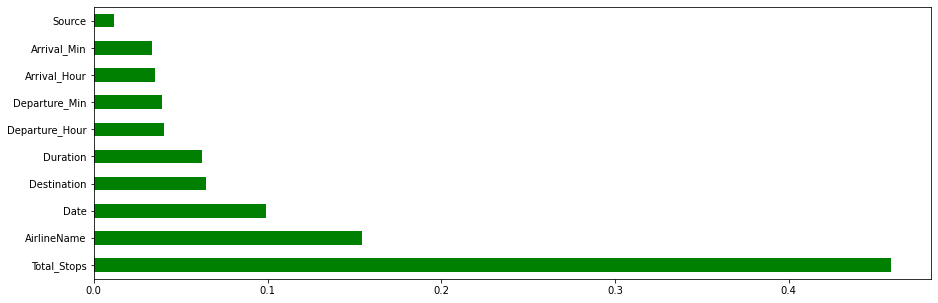

In [129]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

Here with the help of RandomForestRegressor we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Total_Stops", "AirlineName" and "Source" contributing more for prediction which means these features are important for the predictions.

Creating new train test split

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

I am taking 30 percent of the complete dataset for training purpose and the remaining 70 percent will be used to train the machine learning models using the random state.

ML Regression Algorithms with Evaluation Metrics

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

i) Decision Tree Regressor

R2_Score: 66.47449535319019
Mean Absolute Error: 943.1731927710844
Mean Squared Error: 2753859.8230421687
Root Mean Squared Error: 1659.4757675368955


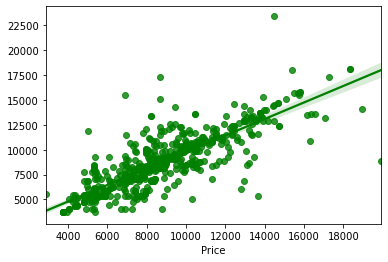

In [132]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

Created Decision Tree Regressor model and checked for its evaluation metrics. The model is giving R2 score as 65.45%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

ii) Random Forest Regressor

R2_Score: 79.79164798756125
Mean Absolute Error: 824.3479441695353
Mean Squared Error: 1659959.1649172679
Root Mean Squared Error: 1288.394025489589


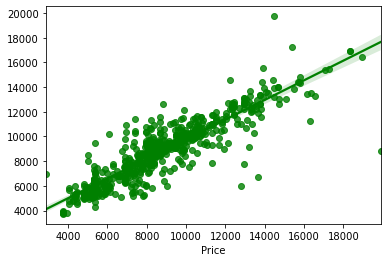

In [133]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

i)Created Random Forest Regressor model and checked for it's evaluation metrics. The model is giving R2 score as 78.60%.
ii)From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

iii) Extra Trees Regressor

R2_Score: 79.72590971856273
Mean Absolute Error: 771.6378501506025
Mean Squared Error: 1665359.0531438158
Root Mean Squared Error: 1290.4879128236016


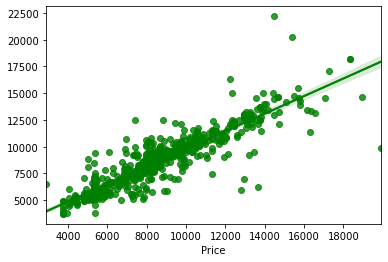

In [134]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

i)Created Extra Trees Regressor model and checked for its evaluation metrics. The model is giving R2 score as 79.13%.
ii)From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

iv) GradientBoosting Regressor

R2_Score: 73.07890022496869
Mean Absolute Error: 1058.8137059935111
Mean Squared Error: 2211359.257484672
Root Mean Squared Error: 1487.0639722233445


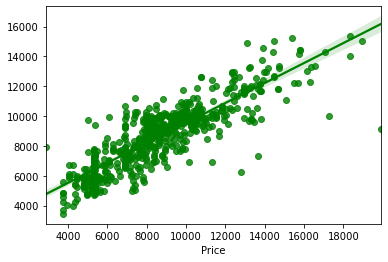

In [135]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

Created GradientBoosting Regressor model and checked for its evaluation metrics. The model is giving R2 score as 72.83%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

v) Extreme Gradient Boosting Regressor (XGB)

R2_Score: 75.83628008398281
Mean Absolute Error: 961.520311838173
Mean Squared Error: 1984861.917903916
Root Mean Squared Error: 1408.8512760060644


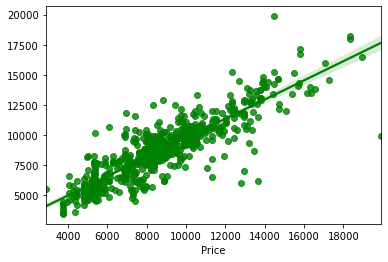

In [136]:

# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

vi) Bagging Regressor

R2_Score: 77.17534419695792
Mean Absolute Error: 869.322482429719
Mean Squared Error: 1874868.201178443
Root Mean Squared Error: 1369.2582667920772


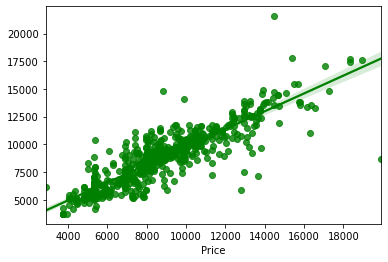

In [137]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

i)Created Bagging Regressor model and checked for its evaluation metrics. The model is giving R2 score as 76.94%.
ii)From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

Model Selection

From the above created models, Extra Trees Regressor algorithm has high R2 score and less RMSE value. So, we can conclude that "Extra Trees Regressor" as the best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

Hyper Parameter Tuning

In [138]:
# Let's Use the GridSearchCV to find the best paarameters in XGBRegressor
from sklearn.model_selection import GridSearchCV

# Extra Trees Regressor
parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1,2]}

I have used 5 Extra Trees Regressor parameters to be saved under the variable "parameter" that will be used in GridSearchCV for finding the best output.

In [139]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

Assigning a variable to the GridSearchCV function after entering all the necessary inputs.

In [ ]:
# Running GridSearchCV
GCV.fit(x_train,y_train)

In [ ]:
# Finding best parameters
GCV.best_params_

In [ ]:
# Creating final model
Flight_price_model = ExtraTreesRegressor(criterion='mae',max_features='auto',min_samples_split=3,n_estimators=1000,n_jobs=-1)

# Prediction
Flight_price_model.fit(x_train, y_train)
pred = Flight_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

Saving the Final model

In [ ]:
# Saving the model using joblib library 
import joblib
joblib.dump(Flight_price_model,"Flight_Ticket_Price_Prediction.pkl")

Loading the saved model and predicting Flight Ticket Price

In [ ]:
# Loading the saved model
Model=joblib.load("Flight_Ticket_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

Creating DataFrame for the predicted values

In [ ]:
Predicted_Flight_Ticket_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])
Predicted_Flight_Ticket_Price

In [ ]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Extra Trees Regressor")
plt.show()

In [ ]:
# Saving the predicted car price values in csv file
Predicted_Flight_Ticket_Price.to_csv("Predicted_Flight_Ticket_Price.csv",index=False)

Conclusion

Key Findings and Conclusion of the Study:

i)The case study aims to give an idea of applying Machine Learning algorithms to predict the price of the flight tickets. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.

ii)First we collected the flights data from website www.yatra.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 2211 of data which contained the ticket price of the flights and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.

iii)Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.

iv)From the visualizations we have done some analysis which I have mentioned already in the EDA conclusion part. 